In [56]:

import seaborn as sns
import pyprind

# basic packages
import pandas as pd
import os
import numpy as np
import re # python regular expressions
import string # for efficient operations with strings
import matplotlib.pyplot as plt
%matplotlib inline

# For creating dictionaries that you can fill in a loop
from collections import defaultdict

# NLTK: A basic, popular NLP package. Find many examples of applications at https://www.nltk.org/book/
# Install guide: https://www.nltk.org/install.html
import nltk
nltk.download('punkt') # you will probably need to do this
nltk.download('wordnet') # and this
nltk.download('stopwords') # aand this

# for vectorization 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Vader Lexicon for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# similarity/distance measures
from scipy.spatial import distance
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

# for classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Lexicons for sentiment analysis
from vaderSentiment import vaderSentiment
from afinn import Afinn

# to display images in notebook
from IPython.display import Image

from pandas.core.common import flatten
from collections import Counter

[nltk_data] Downloading package punkt to /Users/mieharder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mieharder/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mieharder/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
#read dataframes
professor_df=pd.read_csv('df_final.csv')
comment_df=pd.read_csv('df_comments_final.csv')
comment_df['Dates']=pd.to_datetime(comment_df.Dates, format='%Y-%m-%d')
comment_df['Month']=comment_df['Dates'].dt.month

comment_df['Month'].value_counts()
comment_df

,Unnamed: 0,Comments,Quality,Difficulty,Dates,TeacherID,SchoolID,status,Month
0,0,"Professor Acres is incredible--friendly, knowl...",5.0,4.0,2017-05-02,336888,780,top,5.0
1,1,He is an amazing professor- I definitely recom...,5.0,3.0,2017-04-28,336888,780,top,4.0
2,2,Great!,3.0,3.0,2012-03-23,336888,780,top,3.0
3,3,Awesome,5.0,1.0,2011-02-01,336888,780,top,2.0
4,4,Al is an absolutely great professor. His semin...,5.0,4.0,2007-10-21,336888,780,top,10.0
...,...,...,...,...,...,...,...,...,...
81712,81712,Difficult to understand and not very helpful. ...,1.5,3.0,2009-12-23,608528,4171,bottom,12.0
81713,81713,MUY MAL!! This teacher is unorganized and scat...,1.0,1.0,2005-12-22,608528,4171,bottom,12.0
81714,81714,very sweet disposition -- very willing to help...,5.0,1.0,2005-12-20,608528,4171,bottom,12.0
81715,81715,"This professor is very helpful, wants her stud...",5.0,1.0,2005-09-06,608528,4171,bottom,9.0


In [47]:
def preprocess(text):
    low_text= text.lower()
    low_text = low_text.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(low_text)
    porter = nltk.WordNetLemmatizer()
    lemmatizer=[porter.lemmatize(t) for t in tokens]
    stop_words_list = nltk.corpus.stopwords.words("english")
    sent_sw_removed = [i for i in lemmatizer if i not in stop_words_list]
    lemmas=[i for i in sent_sw_removed if i!='br']
    return lemmas # return a list of stems/lemmas

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


<AxesSubplot:xlabel='Month', ylabel='Density'>

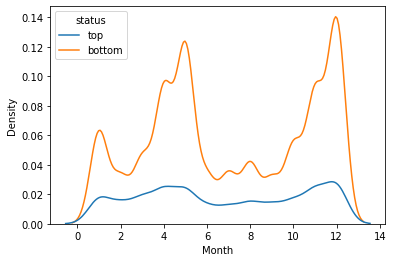

In [26]:
print(type(comment_df.Dates[0]))
plt.figure()
#plt.hist(comment_df.Quality)
#plt.hist(comment_df.Difficulty)
#sns.kdeplot(data=comment_df, x='Month') #antal reviews pr måned
sns.kdeplot(data=comment_df, x='Month', hue='status')

In [48]:
comment_df[comment_df['Comments'].isna()]

,Unnamed: 0,Comments,Quality,Difficulty,Dates,TeacherID,SchoolID,status,Month,Clean_comment


In [69]:
comment_df=comment_df[comment_df['Comments']!='No Comments'].dropna()
comment_df['Clean_comment']=comment_df.apply(lambda row: preprocess(row.Comments), axis = 1)


In [93]:
#sub_top.remove(['class', 'wa', 'professor', 'teacher'])
sub_top


In [109]:
top_uni=comment_df[comment_df['status']=='top']
bottom_uni=comment_df[comment_df['status']=='bottom']
sub_top=list(flatten(list(top_uni.Clean_comment)))
sub_bottom=list(flatten(list(bottom_uni.Clean_comment)))


sub_top_high=top_uni[top_uni.Quality>3]
sub_top_low=top_uni[top_uni.Quality<3]
sub_bottom_high=bottom_uni[bottom_uni.Quality>3]
sub_bottom_low=bottom_uni[bottom_uni.Quality<3]

hej=list(flatten(list(sub_top_high.Clean_comment)))
lort=hej.remove('professor')
lort

In [110]:
top_count=Counter(sub_top).most_common(10)
bottom_count=Counter(sub_bottom).most_common(10)

Counter(lort).most_common(10) #top high
#Counter(list(flatten(list(sub_top_low.Clean_comment)))).most_common(10) #top low
#Counter(list(flatten(list(sub_bottom_high.Clean_comment)))).most_common(10) #bottom high
#Counter(list(flatten(list(sub_bottom_low.Clean_comment)))).most_common(10) #bottom low


[]